In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import dataset
dataset = pd.read_csv('netflix_titles.csv')
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
#Clean up dataset
dataset_1 = dataset.iloc[:, [1,5,6,7,10]]
dataset_1.head()

,type,country,date_added,release_year,listed_in
0,Movie,"United States, India, South Korea, China","September 9, 2019",2019,"Children & Family Movies, Comedies"
1,Movie,United Kingdom,"September 9, 2016",2016,Stand-Up Comedy
2,TV Show,United States,"September 8, 2018",2013,Kids' TV
3,TV Show,United States,"September 8, 2018",2016,Kids' TV
4,Movie,United States,"September 8, 2017",2017,Comedies


## Type of Content Netflix Presents

In [4]:
#Check for unique entry in type
dataset_1['type'].unique()
#Content Netflix presents is divided into 'Movie' & 'TV Show'

#Percentage of each type
movie = 0
tv = 0
number_of_content = dataset_1['type'].count()
for types in dataset_1['type']:
    if types == 'Movie':
        movie = movie + 1
    else:
        tv = tv + 1

movie_per = movie/number_of_content*100
tv_per = tv/number_of_content*100

print ('Number of movies in Netflix: ', movie)
print ('Number of TV shows in Netflix: ', tv)

Number of movies in Netflix:  4265
Number of TV shows in Netflix:  1969


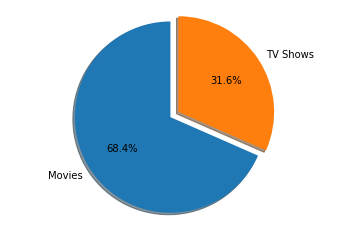

In [5]:
#Pie chart
labels = 'Movies', 'TV Shows'
sizes = [movie, tv]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

###### Netflix's shows contain more movies than TV shows

## Number of Content Released Each Year

In [6]:
#Number of missing data
len(dataset_1['date_added']) - dataset_1['date_added'].count()

11

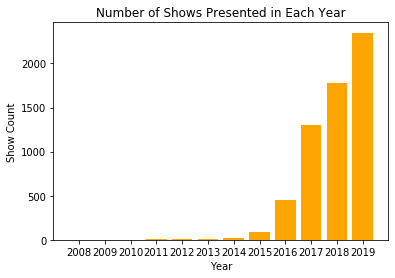

In [7]:
#Since there're only 11 missing data in the date_added column, 
#the shows with missing date added will be dropped
date_added = dataset_1['date_added'].dropna()

#Extract only the year from date and append to a list 'year'. 
#The year of 2020 is also excluded since the last update of the whole dataset was Jan 2020,
#where only a few shows in 2020 were included
years = []
for date in date_added:
    if date[-4:] != '2020':
        years.append(date[-4:])

#Number of shows presented in each year
showCount = {}
uniqueYear = set(years)
#Shows count in each year
for year in uniqueYear:
    showCount[year] = 0
    for y in years:
        if y == year:
            showCount[year] = showCount[year] + 1
#Sort showCount dictionary by year
showCount = dict(sorted(showCount.items()))

#Bar chart
x = []
for key in showCount.keys():
    x.append(key)

y = []
for value in showCount.values():
    y.append(value)

import math
plt.bar(x, y, color='orange')
plt.xlabel('Year')
plt.ylabel('Show Count')
plt.title('Number of Shows Presented in Each Year')
plt.show()

###### Netflix's shows have increased over the years. The number of shows was about 10 times more than it had in 2011. The number also increased significantly between 2015 and 2016 due to the company's decision on expanding the streaming service in the globe to include 150 more countries by the end of 2016 [1] . Another singnificant climb in the number of shows from 2016 to 2017 can be explained by the company's annoucement on releasing 1,000 hours of oringinal shows in 2017 [2].

###### There's a upward trend since 2015. Hence, we can expect the number of shows presented by Netflix in 2020 and the years onwards to also have an upward trend.

###### https://www.nytimes.com/2015/01/21/business/media/netflix-earnings.html [1]
###### https://www.businessinsider.com/netflix-to-release-1000-hours-of-originals-in-2017-2016-10 [2]

## Number of Movies and TV Shows Presented by Netflix Per Year

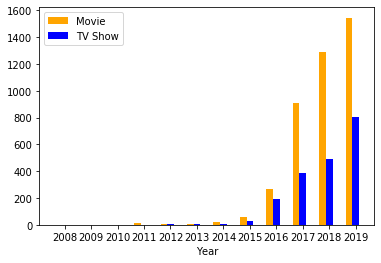

In [8]:
#Remove rows where date_added is missing
dataset_2 = dataset_1.dropna(subset=['date_added'])
dataset_2.head()

showCountPerYear = {}
for year in uniqueYear:
    typeOfShowPerYear = {'Movie': 0, 'TV Show': 0}
    moviePerYear = 0
    tvPerYear = 0
    for i in range(0,len(dataset_2['date_added'])):
        if dataset_2['date_added'][i][-4:] == year:
            if dataset_2['type'][i] == 'Movie':
                moviePerYear = moviePerYear + 1
                typeOfShowPerYear['Movie'] = moviePerYear
            else:
                tvPerYear = tvPerYear + 1
                typeOfShowPerYear['TV Show'] = tvPerYear
    showCountPerYear[year] = typeOfShowPerYear
showCountPerYear = dict(sorted(showCountPerYear.items()))

#Bar Chart
barWidth = 0.25

y1 = []
for value in showCountPerYear.values():
    y1.append(value['Movie'])
y2 = []
for value in showCountPerYear.values():
    y2.append(value['TV Show'])
x = []
for key in showCountPerYear.keys():
    x.append(key)

r1 = np.arange(len(y1))
r2 = [i + barWidth for i in r1]

plt.bar(r1, y1, color='orange', width=barWidth, label='Movie')
plt.bar(r2, y2, color='blue', width=barWidth, label='TV Show')

plt.xlabel('Year')
plt.xticks([i + barWidth for i in range(len(y1))], x)

plt.legend()
plt.show()

###### As the graph and data show, Netflix generally has more movies than TV shows for the past years. For the years 2017 - 2019, the number of movies presented is much higher than the number of TV shows presented.

## Which Category Has the Most Shows in Netflix?

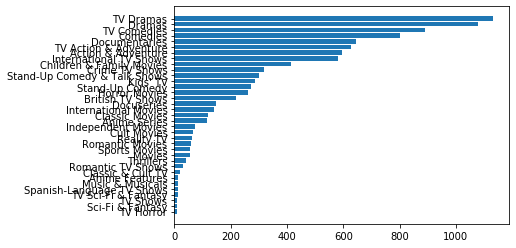

In [9]:
category_year = dataset_1.dropna(subset=['date_added', 'listed_in'])
from datetime import datetime

years_added = []
for date in category_year['date_added']:
    try:
        dt = datetime.strptime(date, '%B %d, %Y')
    except:
        dt = datetime.strptime(date, ' %B %d, %Y')
    years_added.append(dt.year)

#Choosing the first category to avoid duplications
categories = [category.split(', ')[0] for category in dataset_1['listed_in']]
#flatten_categories = [item for category in categories for item in category]
category_count = {}
for unique in set(categories):
    count = 0
    for category in categories:
        if category in unique:
            count = count + 1
            category_count[unique] = count

category_count = dict(sorted(category_count.items(), key=lambda item: item[1], reverse=True))

#Bar chart
y = category_count.keys()
x = category_count.values()
y_pos = np.arange(len(y))
plt.barh(y_pos, x, align='center', height=0.8)
plt.yticks(y_pos, y)
plt.gca().invert_yaxis()
plt.show()

## Shows Presented in Different Countries

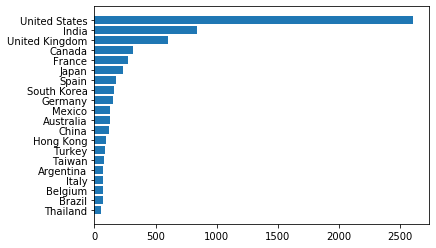

In [10]:
countries = []
#Append the valid country list into countries
for country in dataset_1['country'].dropna():
    countries.append(country.split(','))
#Flatten the list into a single list
allCountries = [ item for elem in countries for item in elem]
#Filter out empty string elements
allCountries = list(filter(None, allCountries))
#Remove spaces in the front of each country
for i in range(0,len(allCountries)):
    if allCountries[i][0] == ' ':
        allCountries[i] = allCountries[i][1:]
uniqueCountries = set(allCountries)
numberOfShows = {}
for country in uniqueCountries:
    num = 0
    for c in allCountries:
        if c == country:
            num = num + 1
            numberOfShows[country] = num

#Sort dictionary by values in descending order
numberOfShows = dict(sorted(numberOfShows.items(), key=lambda item: item[1], reverse=True))
import itertools
#Since Netflix covers a lot of countries and there's a drastic difference in the number of shows between the US
#and the rest of the world, looking at the top 20 countries is able to provide a good insight on the topic
numberOfShows_top20 = dict(itertools.islice(numberOfShows.items(), 20))
y = numberOfShows_top20.keys()
x = numberOfShows_top20.values()
y_pos = np.arange(len(y))

plt.barh(y_pos, x, align='center')
plt.yticks(y_pos, y)
plt.gca().invert_yaxis()
plt.show()


###### As the graph shows, the US has a lot more shows available when comparing to other countries. Among the top 20, there are 7 asian countries.

## Years that Netflix Started to Expend its Service in Asia

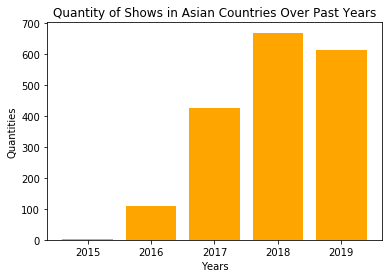

In [11]:
from bs4 import BeautifulSoup
import requests

#Drop rows where both 'country' and 'date_added' are nan
dataset_3 = dataset_1.dropna(subset=['country', 'date_added'])
shows_countries = [country.split(',') for country in dataset_3['country']]
shows_years = [year[-4:] for year in dataset_3['date_added'] if year[-4:]]

#Get all asian countries from the source link
asianCountries = []
response = requests.get('https://geology.com/world/asia-satellite-image.shtml')
soup = BeautifulSoup(response.content, 'lxml')
#Scrape the name in text of all the asian countries
for country in soup.find_all('div', {'class': 'max780'}):
    name = country.find_all('a')
    for i in name:
        asianCountries.append(i.getText())
#Filter out empty string elements
asianCountries = list(filter(None, asianCountries))
#Filter out non-country elements
asianCountries = asianCountries[:-6]
#Clear out spaces in front of country names
new_asianCountries = [country[1:] if country[0] == ' ' else country for country in asianCountries]
#Drop all empty strings and spaces in front of country names
new_shows_countries = []
for country in shows_countries:
    new_country = []
    country = list(filter(None, country))
    for c in country:
        if c[0] == ' ':
            new_country.append(c[1:])
        else:
            new_country.append(c)
    new_shows_countries.append(new_country)

for country in new_shows_countries[:]:
    for c in country[:]:
        if c not in new_asianCountries:
            country.remove(c)
            
netflix_asia = {}
for year in set(shows_years):
    count = 0
    for i in range(0,len(new_shows_countries)):
        if new_shows_countries[i] and shows_years[i]==year:
            count = count + 1
        netflix_asia[year] = count
netflix_asia = dict(sorted(netflix_asia.items()))
del netflix_asia['2020']

#Bar chart
x = [key for key in netflix_asia.keys() if netflix_asia[key] > 0]
y = [value for value in netflix_asia.values() if value > 0]
plt.bar(x, y, color='orange')
plt.xlabel('Years')
plt.ylabel('Quantities')
plt.title('Quantity of Shows in Asian Countries Over Past Years')
plt.show()

###### Netflix started its service in Asia in 2015. The quantities of shows increased significantly from 2016 to 2017.

## Is Netflix Making the Right Choice in Choosing What Shows to be Presented?

In [12]:
dataset_4 = dataset.iloc[:,[2,3,4]].dropna(subset=['title', 'director', 'cast'])
dataset_4.reset_index(drop=True, inplace=True)
directors = [director.split(',') for director in dataset_4['director']]
casts = [cast.split(',') for cast in dataset_4['cast']]

#Clean out empty spaces in front of the director/cast name
for i in range(0,len(directors)):
    for j in range(0,len(directors[i])):
        if directors[i][j][0] == ' ':
            directors[i][j] = directors[i][j][1:]
            
for i in range(0,len(casts)):
    for j in range(0,len(casts[i])):
        if casts[i][j][0] == ' ':
            casts[i][j] = casts[i][j][1:]

#Permute directors and casts for each show
from itertools import product, chain
directors_casts = []
for i in range(0,len(directors)):
    directors_casts.append(map(','.join, product(directors[i], casts[i])))

#Turn map object into list
for i in range(0,len(directors_casts)):
    directors_casts[i] = [*directors_casts[i]]

from collections import Counter
#Flatten the nested list
directors_casts_freq = {k:v for k,v in Counter(chain(*[i for i in directors_casts])).items()}
#Count the appearance of each director/cast combination
directors_casts_freq = dict(sorted(directors_casts_freq.items(), key=lambda item:item[1], reverse=True))
#directors_casts_freq

In [13]:
title_most_freq_combination = []
#Return unique title in which its director/cast involves in more than 5 shows
#listed on Netflix
for key in directors_casts_freq.keys():
    if directors_casts_freq[key] >= 5:
        combination = key.split(',')
        for i in range(0,len(dataset_4)):
            if combination[0] in dataset_4['director'][i].split(', ') and combination[1] in dataset_4['cast'][i].split(', '):
                title_most_freq_combination.append(dataset_4['title'][i])

import re
#Removie duplicate shows in different languages
for i in range(0,len(title_most_freq_combination)):
    if 'Version' in title_most_freq_combination[i]:
        title_most_freq_combination[i] = re.sub(r'\(.*?\)', '', title_most_freq_combination[i])
movies = set(title_most_freq_combination)

import string
movie_search = [movie.translate(str.maketrans('', '', string.punctuation)).replace(' ', '+') for movie in movies]
#Scraping links from IMDB
def imdb_ratings(list):
    l2 = []
    for l in list:
        response = requests.get('https://www.imdb.com/find?q=' + l)
        soup = BeautifulSoup(response.content, 'lxml')
        try:
            header = soup.find_all('h3', {'class': 'findSectionHeader'})
            section = soup.find_all('div', {'class': 'findSection'})
            if header[0].getText() == 'Names':
                section = section[1]
            else:
                section = section[0]
            title = section.find_all('td', {'class': 'result_text'})[0]
            link = title.find_all('a', href=True)[0]['href']
            full_url = 'http://imdb.com' + link
            l2.append(full_url)
        except:
            pass
    return l2
valid_movie_urls = imdb_ratings(movie_search)

In [14]:
ratings = []
#Scraping ratings from IMDB
for url in valid_movie_urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'lxml')
    try:
        rating = soup.find('span', {'itemprop': 'ratingValue'}).getText()
    except:
        pass
    ratings.append(float(rating))

6.654545454545455


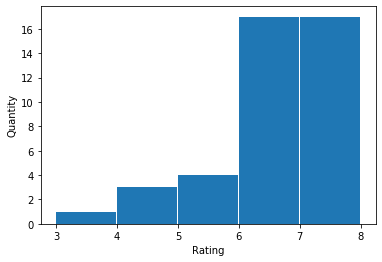

In [15]:
#q25, q75 = np.percentile(ratings, [.25, .75])
#bin_width = 2*(q75 - q25)*len(ratings)**(-1/3)
#bins = int(round((max(ratings)-min(ratings))/bin_width))
print(sum(ratings)/len(ratings))
#Histogram 
bins = np.array([3,4,5,6,7,8])
plt.hist(ratings, bins = bins, width=0.99)
plt.ylabel('Quantity')
plt.xlabel('Rating')
plt.show()

###### The data above analyzes whether Netflix is making the right choice in choosing their shows. The analysis looks into how many shows on Netflix are a director/actor combo involed in. 
###### If a director/actor combo appears in more than or equal to a number of shows, it is considered to be a popular combo. If Netflix acquires more shows that involve such combo, those shows may be more appealing to viewers. Hence, providing more viewership. For this analysis, the threshold, which is the number of shows, is set to 5.
###### As the ratings from IMDB show, more shows fall within the 6.0 - 8.0 range with an average of 6.5. The average rating is not high enough to indicate that viewers love the shows with popular combo. 